### Problem Statement
An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market. 
<br><br>
In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers. 
<br><br>
We are required to help the manager to predict the right group of the new customers.<br><br>
We can check this link: https://datahack.analyticsvidhya.com/contest/janatahack-customer-segmentation/

### Variables Description

           
| Variable	            | Definition                                                        |
|---------------------- |-------------------------------------------------------------------|
| ID	                | Unique ID                                                         |
| Gender	            | Gender of the customer                                            |
| Ever_Married	        | Marital status of the customer                                    |
| Age	                | Age of the customer                                               |
| Graduated	            | Is the customer a graduate?                                       |
| Profession	        | Profession of the customer                                        |
| Work_Experience	    | Work Experience in years                                          |
| Spending_Score	    | Spending score of the customer                                    |
| Family_Size	        | Number of family members for the customer(including the customer) |
| Var_1	                | Anonymised Category for the customer                              |
| Segmentation(target)  | Customer Segment of the customer                                  |

In [1]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer/sample_submission.csv
/kaggle/input/customer/Train.csv
/kaggle/input/customer/Test.csv


In [1]:
# Import Scientific and Data Manipulation Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
# to increase no. of rows and column visibility in outputs
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Load data 

train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sub = pd.read_csv('sample_submission.csv')

#### Training data

In [3]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
train.shape

(8068, 11)

In [5]:
# Looking for train dataset informations
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


We have 7 categoricals variables and 3 numericals variables in our training dataset

#### Testing data

In [6]:
test.shape

(2627, 10)

In [7]:
# Looking for test dataset informations
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


# EDA(Exploratory Data Analysis) and Vizualisation

## Segmentation

In [8]:
print('Count of each category of segmentation\n',train.Segmentation.value_counts(normalize=True))

Count of each category of segmentation
 D    0.281111
A    0.244422
C    0.244175
B    0.230293
Name: Segmentation, dtype: float64


### Check for the imbalance of train 

/Users/MC/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Segmentation', ylabel='count'>

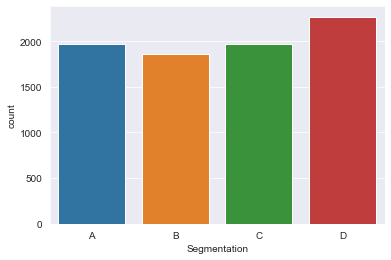

In [9]:
import seaborn as sns
sns.countplot(train['Segmentation'], order=['A','B','C','D'])

### Finding and Removing Duplicate Rows from the train and test datasets if present.

In [10]:
# Check for duplicate 
print('Duplicated value(s) in our train dataset : ', train.duplicated().sum())
print('Duplicated value(s) in our test dataset : ', test.duplicated().sum())

Duplicated value(s) in our train dataset :  0
Duplicated value(s) in our test dataset :  0


### Checking for missing values

In [11]:
train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

## Cleaning or filling missing data and creation of some new attributes based upon given data/domain knowledge/prior experience.

### Missing-Data-Techniques

CCA- Complete case analysis, in this technique we drops the NAN values.

3M- Mean,Median and Mode , in this technique we use these Ms for imputation

End tail imputation - we use statistical method to impute missing values

Missing tag imputation - here we use tags to impute the values

Random-sample imputation - here we take random sample of dame size as of our missing values

## Var_1

In [12]:
print('The count of each category\n',train.Var_1.value_counts())

The count of each category
 Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64


In [13]:
# Checking for null values
train.Var_1.isnull().sum()

76

In [14]:
train['Var_1'].fillna(train['Var_1'].mode()[0], inplace=True)

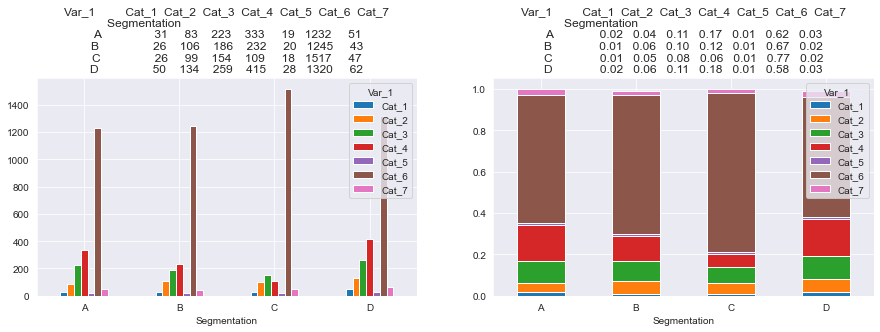

In [15]:
# Counting Var_1 in each segment
ax1 = train.groupby(["Segmentation"])["Var_1"].value_counts().unstack().round(3)

# Percentage of category of Var_1 in each segment
ax2 = train.pivot_table(columns='Var_1',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

In each of the segment the count of cat_6 or proportion of cat_6 is very high i.e. most of the entries in the given data belongs to cat_6.
Cat_6 Cat_4 Cat_3 Cat_2 are the most important labels

## Gender

In [16]:
print('The count of gender\n',train.Gender.value_counts())

The count of gender
 Male      4417
Female    3651
Name: Gender, dtype: int64


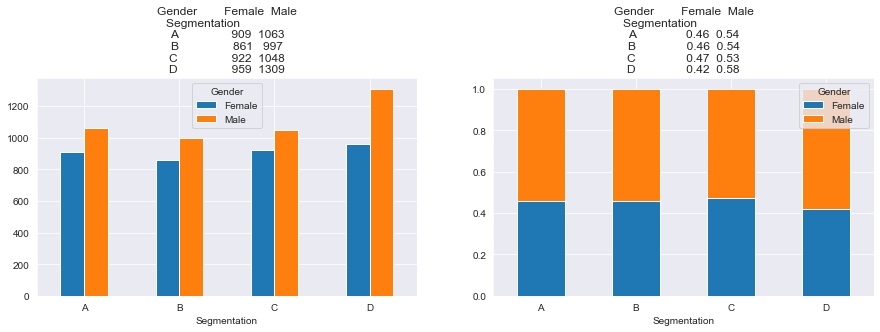

In [17]:
# Counting male-female in each segment
ax1 = train.groupby(["Segmentation"])["Gender"].value_counts().unstack().round(3)

# Percentage of male-female in each segment
ax2 = train.pivot_table(columns='Gender',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

All the 4 segments have around same number of male-female distribution. In all segment male are more than female. <br> 
But segment D has highest male percentage as compared to other segments.

## Ever Married

In [18]:
print('Count of married vs not married\n',train.Ever_Married.value_counts())

Count of married vs not married
 Yes    4643
No     3285
Name: Ever_Married, dtype: int64


In [19]:
# Checking the count of missing values
train.Ever_Married.isnull().sum()

140

In [20]:
train['Ever_Married'].fillna(train['Ever_Married'].mode()[0], inplace=True)

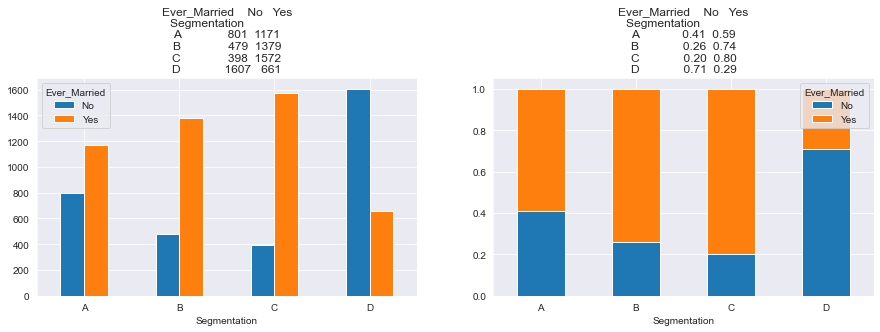

In [21]:
# Counting married and non-married in each segment
ax1 = train.groupby(["Segmentation"])["Ever_Married"].value_counts().unstack().round(3)

# Percentage of married and non-married in each segment
ax2 = train.pivot_table(columns='Ever_Married',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

We saw that most of the customers in segment C are married while segment D has the least number of married customers. It means segment D is a group of customers that are singles and maybe younger in age.

## Age

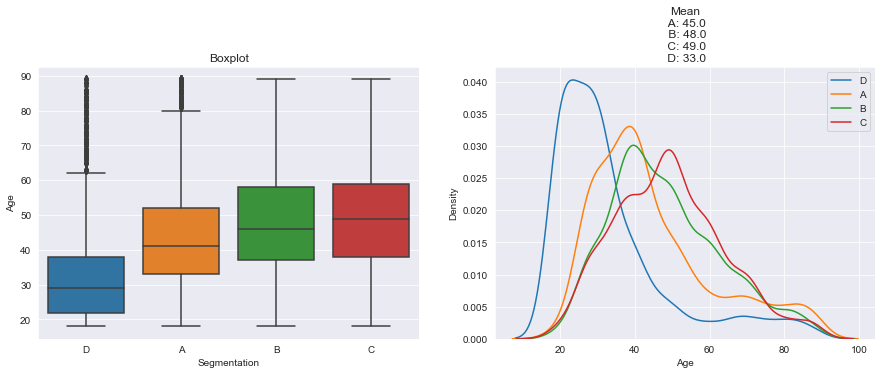

In [26]:
# Looking the distribution of column Age with respect to each segment
a = train[train.Segmentation =='A']["Age"]
b = train[train.Segmentation =='B']["Age"]
c = train[train.Segmentation =='C']["Age"]
d = train[train.Segmentation =='D']["Age"]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data = train, x = "Segmentation", y="Age")
plt.title('Boxplot')

plt.subplot(1,2,2)
sns.kdeplot(d,shade= False, label = 'D')
sns.kdeplot(a,shade= False, label = 'A')
sns.kdeplot(b,shade= False, label = 'B')
sns.kdeplot(c,shade= False, label = 'C')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.title("Mean\n A: {}\n B: {}\n C: {}\n D: {}".format(round(a.mean(),0),round(b.mean(),0),round(c.mean(),0),round(d.mean(),0)))

plt.show()

The mean age of segment D is 33 and we can say that people in this segment are belong to 30s i.e. they are younger and also from 'ever_married' distribution it is seen that segment D has maximum number of customers who are singles indicating they are younger.<br>
Also segment C has mean age of 49 and we also seen that most customers in this segment are married. 

## Graduated

In [27]:
print('Count of each graduate and non-graduate\n',train.Graduated.value_counts())

Count of each graduate and non-graduate
 Yes    4968
No     3022
Name: Graduated, dtype: int64


In [28]:
# Checking the count of missing values
train.Graduated.isnull().sum()

78

In [29]:
train['Graduated'].fillna((train['Graduated'].mode()[0]), inplace=True)

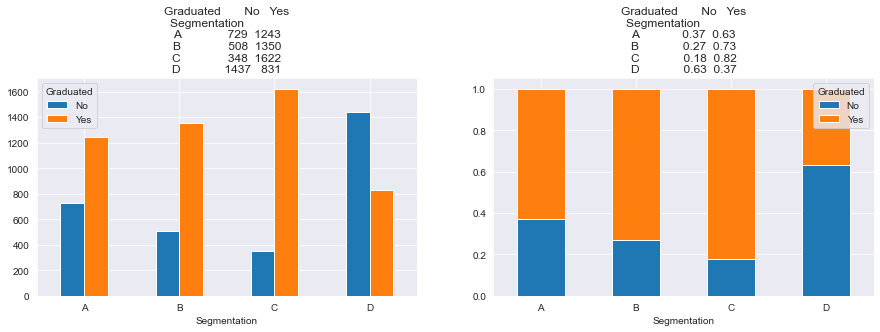

In [30]:
# Counting graduate and non-graduate in each segment
ax1 = train.groupby(["Segmentation"])["Graduated"].value_counts().unstack().round(3)

# Percentage of graduate and non-graduate in each segment
ax2 = train.pivot_table(columns='Graduated',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

Segment C has most number of customers who are graduated while segment D has lowest number of graduate customers.

## Profession

In [31]:
print('Count of each profession\n',train.Profession.value_counts())

Count of each profession
 Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64


In [32]:
# Checking the count of missing values
train.Profession.isnull().sum()

124

In [33]:
train['Profession'].fillna(train['Profession'].mode()[0], inplace=True)

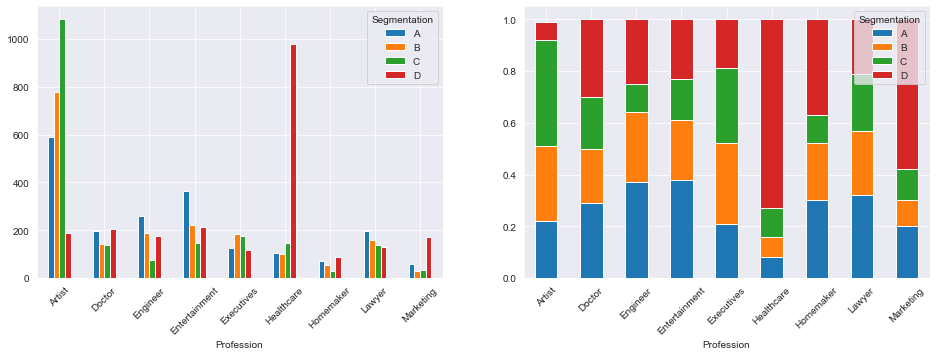

In [34]:
# Count of segments in each profession
ax1 = train.groupby(["Profession"])["Segmentation"].value_counts().unstack().round(3)

# Percentage of segments in each profession
ax2 = train.pivot_table(columns='Segmentation',index='Profession',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (16,5))
label = ['Artist','Doctor','Engineer','Entertainment','Executives','Healthcare','Homemaker','Lawyer','Marketing']
ax[0].set_xticklabels(labels = label,rotation = 45)

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (16,5))
ax[1].set_xticklabels(labels = label,rotation = 45)

plt.show()

Segment A,B and C have major customers from profession:**Artist** while Segment D have major customers from profession:**Healthcare** <br>
**Homemaker** is least in all the four segment

## Work Experience

In [35]:
# Checking the count of missing values
train.Work_Experience.isnull().sum()

829

In [36]:
train['Work_Experience'].fillna(train['Work_Experience'].mode()[0], inplace=True)

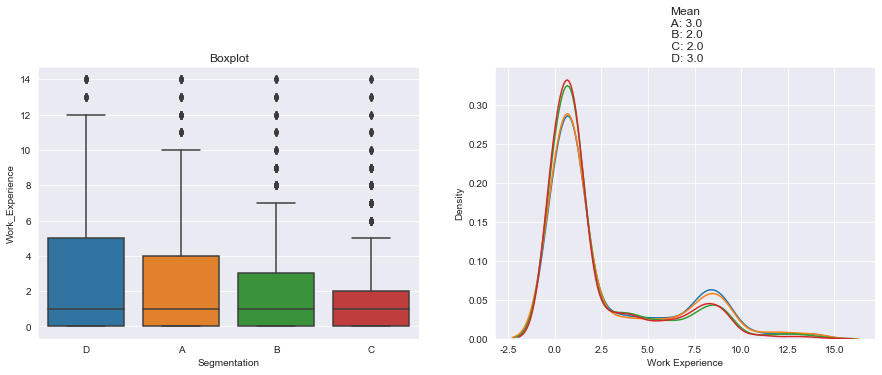

In [37]:
# Looking the distribution of column Work_Experience w.r.t to each segment
a = train[train.Segmentation =='A']["Work_Experience"]
b = train[train.Segmentation =='B']["Work_Experience"]
c = train[train.Segmentation =='C']["Work_Experience"]
d = train[train.Segmentation =='D']["Work_Experience"]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data = train, x = "Segmentation", y="Work_Experience")
plt.title('Boxplot')

plt.subplot(1,2,2)
sns.kdeplot(d,shade= False, label = 'D')
sns.kdeplot(a,shade= False, label = 'A')
sns.kdeplot(b,shade= False, label = 'B')
sns.kdeplot(c,shade= False, label = 'C')
plt.xlabel('Work Experience')
plt.ylabel('Density')
plt.title("Mean\n A: {}\n B: {}\n C: {}\n D: {}".format(round(a.mean(),0),round(b.mean(),0),round(c.mean(),0),round(d.mean(),0)))

plt.show()

Segment D has people with relatively more experienced than other segments while Segment C has people with low experience

## Spending Score

In [40]:
print('Count of spending score\n',train.Spending_Score.value_counts())

Count of spending score
 Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64


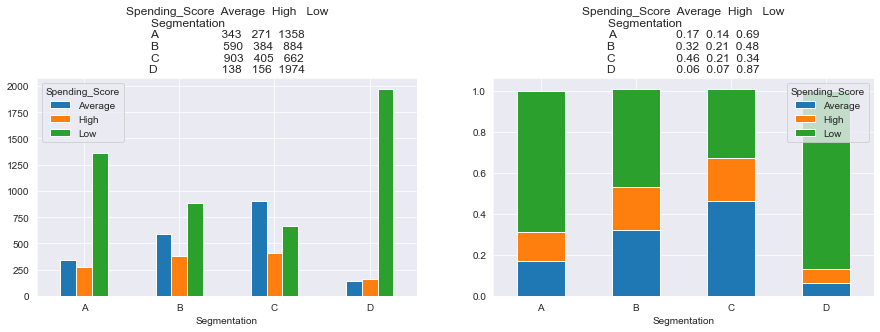

In [41]:
# Counting different category of spending score in each segment
ax1 = train.groupby(["Segmentation"])["Spending_Score"].value_counts().unstack().round(3)

# Percentage of spending score in each segment
ax2 = train.pivot_table(columns='Spending_Score',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

## Family Size

In [42]:
# Checking the count of missing values
train.Family_Size.isnull().sum()

335

In [43]:
train['Family_Size'].fillna((train['Family_Size'].mean()), inplace=True)

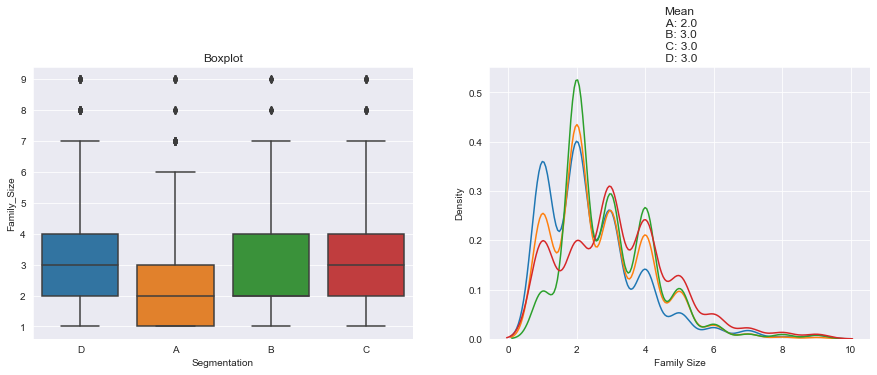

In [44]:
# Looking the distribution of column Family Size w.r.t to each segment
a = train[train.Segmentation =='A']["Family_Size"]
b = train[train.Segmentation =='B']["Family_Size"]
c = train[train.Segmentation =='C']["Family_Size"]
d = train[train.Segmentation =='D']["Family_Size"]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data = train, x = "Segmentation", y="Family_Size")
plt.title('Boxplot')

plt.subplot(1,2,2)
sns.kdeplot(a,shade= False, label = 'A')
sns.kdeplot(b,shade= False, label = 'B')
sns.kdeplot(c,shade= False, label = 'C')
sns.kdeplot(d,shade= False, label = 'D')
plt.xlabel('Family Size')
plt.ylabel('Density')
plt.title("Mean\n A: {}\n B: {}\n C: {}\n D: {}".format(round(a.mean(),0),round(b.mean(),0),round(c.mean(),0),round(d.mean(),0)))

plt.show()

In the given data it is observed that most of the people have family size of 1 or 2 (i.e. they have small family).<br> But Segment D has more number of  big families as compared to other segments.

In [45]:
train.Segmentation.value_counts(normalize=True)

D    0.281111
A    0.244422
C    0.244175
B    0.230293
Name: Segmentation, dtype: float64

Our model baseline is 0.28 

# Features Engineering

### Data Encoding- Label Encoding

As the ID column is not useful in dividing customers into segments because it is any random value thus having no correlations with the segmentation , we could drop it. 

In [46]:
train.drop(['ID'],inplace=True,axis=1)
train.head(5)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A


In [47]:
# Encoding
from sklearn.preprocessing import LabelEncoder


binary_columns = ["Gender", "Ever_Married" , "Graduated"]


Encoder = LabelEncoder()
for column in binary_columns:
     train[column] = Encoder.fit_transform(tuple(train[ column ]))

train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,Healthcare,1.0,Low,4.0,Cat_4,D
1,0,1,38,1,Engineer,1.0,Average,3.0,Cat_4,A
2,0,1,67,1,Engineer,1.0,Low,1.0,Cat_6,B
3,1,1,67,1,Lawyer,0.0,High,2.0,Cat_6,B
4,0,1,40,1,Entertainment,1.0,High,6.0,Cat_6,A


In [48]:
# We use Dummy Variable Encoding for profession
profession=pd.get_dummies(train.Profession)
train.drop(['Profession'],axis=1,inplace=True)
profession.head()

,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0


In [49]:
# We join our profession dataframe to our train dataset
train=train.join(profession)

In [50]:
# Spending_Score
train.Spending_Score=pd.Categorical(train.Spending_Score,categories=['Low','Average','High'],ordered=True).codes

# Var_1
train.Var_1=pd.Categorical(train.Var_1).codes

### Checking for the correlation between all features and the labels

In [51]:
# Creating encoded label Dataframe
label=pd.Categorical(train.Segmentation,categories=['A','B','C','D']).codes
label

array([3, 0, 1, ..., 3, 1, 1], dtype=int8)

In [52]:
# Correlation between features and label
correlation_data=pd.DataFrame(label,columns=['label'])
correlation_data=correlation_data.join(train)
correlation_data.head()

,label,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,3,1,0,22,0,1.0,0,4.0,3,D,0,0,0,0,0,1,0,0,0
1,0,0,1,38,1,1.0,1,3.0,3,A,0,0,1,0,0,0,0,0,0
2,1,0,1,67,1,1.0,0,1.0,5,B,0,0,1,0,0,0,0,0,0
3,1,1,1,67,1,0.0,2,2.0,5,B,0,0,0,0,0,0,0,1,0
4,0,0,1,40,1,1.0,2,6.0,5,A,0,0,0,1,0,0,0,0,0


<AxesSubplot:>

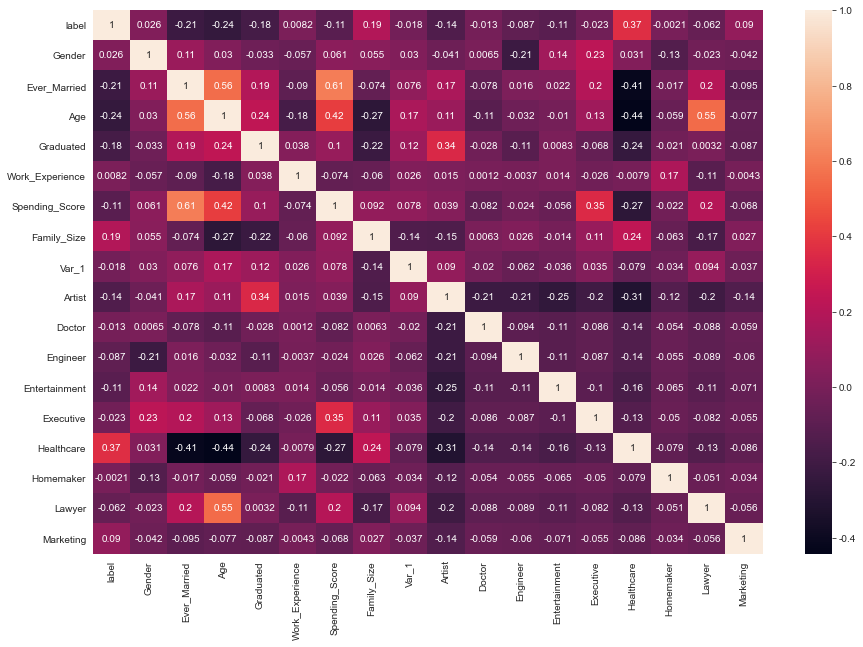

In [53]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation_data.corr(),annot=True)

In [54]:
# Label and Features datasets
# For the Y_train we will use the label encoded dataframe
# and for the X_train we will drop the label from our dataset
Y_train=label
X_train=train.drop('Segmentation',axis=1)

In [55]:
Y_train.shape

X_train.shape

(8068, 17)

## Splitting the data for training and validation

In [56]:
# Spliting our dataframes to train(X_train, y_train) and validation(X_valid, y_valid) subsets
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size=.25, random_state=2)

# XGBClassifer Model

In [52]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import KFold
# grid = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5, 15],
#         }
# kf = KFold(n_splits=2)

# gs = GridSearchCV(estimator = XGBClassifier(n_estimators=500), param_grid = grid, scoring='accuracy', n_jobs=4, cv=kf)

In [53]:
# gs.fit(X_train, y_train)

# y_pred = gs.predict(X_valid)

In [54]:
# from sklearn.metrics import accuracy_score

# accuracy = accuracy_score(y_valid, y_pred)
# print("Gs Accuracy: %.2f%%" % (accuracy * 100.0))

In [55]:
# gs.best_estimator_

In [56]:
from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=5,
              learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=1, n_estimators=500, n_jobs=4,
              nthread=None, objective='multi:softprob', eval_metric='mlogloss', use_label_encoder=False,
              random_state=0,reg_alpha=0, reg_lambda=1, scale_pos_weight=None, seed=None,
              silent=None, subsample=0.8, verbosity=None)

In [57]:
from sklearn.metrics import accuracy_score
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_valid)

In [58]:
accuracy = accuracy_score(y_valid, y_pred)
print("Xgb Accuracy: %.2f%%" % (accuracy * 100.0))

Xgb Accuracy: 53.05%


In [59]:
# Show features importances according to the model
xgb.feature_importances_

array([0.02661175, 0.14445354, 0.08410087, 0.05998418, 0.02583854,
       0.13307418, 0.03431807, 0.03100024, 0.10103707, 0.02716789,
       0.03560305, 0.05328003, 0.02710623, 0.11475757, 0.01834632,
       0.02400566, 0.05931481], dtype=float32)

## LGBMClassifier Model

In [57]:
# Tuning the Hyperparameters(Core parameters) of LighGBM Classifier :
from lightgbm import LGBMClassifier

model = LGBMClassifier(    boosting_type='gbdt', 
                           max_depth=5, 
                           learning_rate=0.01, 
                           objective='multiclass', # Multi Class Classification
                           n_estimators=100,
                           n_jobs=-1 )

In [58]:
Lgbm = model.fit(X_train, y_train,eval_metric='multi_logloss',eval_set=(X_valid , y_valid))
valid_accuracy = Lgbm.score(X_valid , y_valid)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_logloss: 1.37708
[2]	valid_0's multi_logloss: 1.37114
[3]	valid_0's multi_logloss: 1.36535
[4]	valid_0's multi_logloss: 1.35967
[5]	valid_0's multi_logloss: 1.35414
[6]	valid_0's multi_logloss: 1.34873
[7]	valid_0's multi_logloss: 1.34349
[8]	valid_0's multi_logloss: 1.33838
[9]	valid_0's multi_logloss: 1.33334
[10]	valid_0's multi_logloss: 1.32847
[11]	valid_0's multi_logloss: 1.32368
[12]	valid_0's multi_logloss: 1.31898
[13]	valid_0's multi_logloss: 1.31444
[14]	valid_0's multi_logloss: 1.30992
[15]	valid_0's multi_logloss: 1.30556
[16]	valid_0's multi_logloss: 1.30128
[17]	valid_0's multi_logloss: 1.2971
[18]	valid_0's multi_logloss: 1.29303
[19]	valid_0's multi_logloss: 1.289
[20]	valid_0's multi_logloss: 1.28506
[21]	valid_0's multi_logloss: 1.28119
[22]	valid_0's multi_logloss: 1.27734
[23]	valid_0's multi_logloss: 1.2736
[24]	vali

In [62]:
accuracy = valid_accuracy
print("LGBM Accuracy: %.2f%%" % (accuracy * 100.0))

LGBM Accuracy: 53.00%


## RandomForestClassifier Model

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
Rf = RandomForestClassifier(
    max_depth=2, 
    random_state=0,
    n_estimators=1000)

Rf.fit(X_train, y_train)
y_pred = Rf.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
print("RF Accuracy: %.2f%%" % (accuracy * 100.0))

RF Accuracy: 49.28%
